In [1]:
import os
import math
import sys
import time
import copy

import cv2

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns


In [60]:
"""
- get responsible files for our target time durations (e.g., 7am to 9am)
"""
DATA_COLUMNS_NAME = ['taxiID', 'lat', 'lng', 'alt', 'time', 'azim', 'vel', 'gpstype', 'occ']

DATA_BASEDIR = "/home/gskim/data/CE545 Taxi/data"

TARGET_DATE = "2018-04-02"
TARGET_DURATION = ["073000", "093000"]

taget_date_dir = os.path.join(DATA_BASEDIR, TARGET_DATE)
taget_date_files = os.listdir(taget_date_dir)
taget_date_files.sort()

taget_date_files_in_duration = []
for filename in taget_date_files:
    if TARGET_DURATION[0] < filename[:-4] and filename[:-4] < TARGET_DURATION[1]:
        taget_date_files_in_duration.append(filename)
print(taget_date_files_in_duration)
print("\nThe number of files: ", len(taget_date_files_in_duration))

['073230.DAT', '073500.DAT', '073730.DAT', '074000.DAT', '074230.DAT', '074500.DAT', '074730.DAT', '075000.DAT', '075230.DAT', '075500.DAT', '075730.DAT', '080000.DAT', '080230.DAT', '080500.DAT', '080730.DAT', '081000.DAT', '081230.DAT', '081500.DAT', '081730.DAT', '082000.DAT', '082230.DAT', '082500.DAT', '082730.DAT', '083000.DAT', '083230.DAT', '083500.DAT', '083730.DAT', '084000.DAT', '084230.DAT', '084500.DAT', '084730.DAT', '085000.DAT', '085230.DAT', '085500.DAT', '085730.DAT', '090000.DAT', '090230.DAT', '090500.DAT', '090730.DAT', '091000.DAT', '091230.DAT', '091500.DAT', '091730.DAT', '092000.DAT', '092230.DAT', '092500.DAT', '092730.DAT']

The number of files:  47


In [61]:
def cleaning_df(df):
    return df

In [4]:
"""
- merge all (in that time zone) files 
- make data frame per each car 
"""

dfs = []
for filename in taget_date_files_in_duration:
    # read
    df_path = os.path.join(taget_date_dir, filename)
    df = pd.read_csv(df_path)
    df.columns = DATA_COLUMNS_NAME  

    # clean
    df = cleaning_df(df)

    # add
    dfs.append(df)

# merge and make all-in-one dataframe   
df_all = pd.concat(dfs)   

# for memory saving 
del dfs
df_all = df_all.drop("gpstype", axis=1)

In [62]:
# sort by taxi ID
# df_all = df_all.sort_values(["taxiID"], ascending=[True])
# df_all = df_all.reset_index(drop=True)

# grouping by taxi ID
taxi_grouped = df_all.groupby('taxiID')
taxi_grouped.count()

,lat,lng,alt,time,azim,vel,occ
taxiID,,,,,,,
180000525,45,45,45,45,45,45,45
180000826,545,545,545,545,545,545,545
180002092,690,690,690,690,690,690,690
180002578,15,15,15,15,15,15,15
180003216,705,705,705,705,705,705,705
180100817,690,690,690,690,690,690,690
180103394,641,641,641,641,641,641,641
180104894,690,690,690,690,690,690,690
180105156,6,6,6,6,6,6,6


In [63]:
taxi = taxi_grouped.get_group(180783636)
taxi = taxi.sort_values(["time"], ascending=[True])
taxi = taxi.reset_index(drop=True)

taxi

,taxiID,lat,lng,alt,time,azim,vel,occ
0,180783636,1270253010,375028480,0,20180402073104,338,35,0
1,180783636,1270250100,375033680,0,20180402073114,339,9,0
2,180783636,1270249360,375034330,0,20180402073124,351,0,0
3,180783636,1270249360,375034330,0,20180402073134,351,0,0
4,180783636,1270249360,375034330,0,20180402073144,351,0,0
5,180783636,1270249360,375034330,0,20180402073154,351,0,0
6,180783636,1270249360,375034330,0,20180402073204,351,0,0
7,180783636,1270249360,375034330,0,20180402073214,351,0,0
8,180783636,1270249360,375034330,0,20180402073224,351,0,0
9,180783636,1270249360,375034330,0,20180402073234,351,4,0


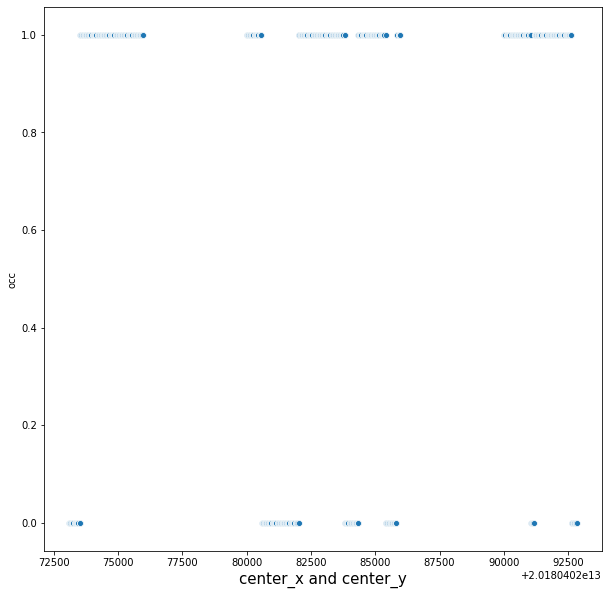

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x="time", y="occ", data=taxi)
plt.xlabel('center_x and center_y', fontsize=15)
plt.show()
